In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.constants as const


In [133]:
# Raman Spectroscopy data is in the form of a .txt file in the data folder
# The data is in the form of a 2 column table with the first column being the Raman shift in cm^-1 and the second column being the intensity of the Raman shift
# The numbers are separated by tabs and the first row is a header row
# The numbers are floats with . as the decimal separator and 6 decimal places

C = np.array(pd.read_csv("data/Diamant-0,5s-10pc-10acq.txt", sep="\t", decimal="."))
C = np.array(pd.read_csv("data/Diamant-0,5s-10pc-10acq.txt", sep="\t", decimal="."))
GaAs = np.array(pd.read_csv("data/GaAs-8s-50lp-10acc.txt", sep="\t", decimal="."))
# GaN1 = np.array(pd.read_csv("data/GaN-3s-10lp-20acc.txt", sep="\t", decimal="."))
GaN2 = np.array(pd.read_csv("data/GaN-3s-10lp-50acc.txt", sep="\t", decimal="."))
GaP = np.array(pd.read_csv("data/GaP-0,1s-10lp-20acc.txt", sep="\t", decimal="."))
Ge = np.array(pd.read_csv("data/germanium-10s-10lp-10acc.txt", sep="\t", decimal="."))
Si = np.array(pd.read_csv("data/silizium-1s-10pc-10acq.txt", sep="\t", decimal="."))

filter1 = np.array(pd.read_csv("data/filter-mit-licht.txt", sep="\t", decimal="."))
filter2 = np.array(pd.read_csv("data/filter-mit-licht-0,5s-10pc-10acq.txt", sep="\t", decimal="."))


ZnO_1 = [np.array(pd.read_csv(f'data/ZnO1-10s-50lp-3acc-30gradsteps.txt', sep="\t", decimal="."))]
for i in range(1, 12):
    ZnO_1.append(np.array(pd.read_csv(f'data/ZnO1-10s-50lp-3acc-30gradsteps-{i}.txt', sep="\t", decimal=".")))

ZnO_2 = [np.array(pd.read_csv(f'data/ZnO2-10s-50lp-3acc-30gradsteps.txt', sep="\t", decimal="."))]
for i in range(1, 12):
    ZnO_2.append(np.array(pd.read_csv(f'data/ZnO2-10s-50lp-3acc-30gradsteps-{i}.txt', sep="\t", decimal=".")))


In [134]:
def plot_raman(data, title="", file=None, show=False, legend=False, label=None):
    if label is None:
        label = title
    plt.plot(data[:, 0], data[:, 1], label=label)
    plt.xlabel("Raman shift / cm⁻¹")
    plt.ylabel("Intensität / arb. u")
    # plt.title(title)
    plt.minorticks_on()
    plt.grid()
    if legend:
        plt.legend()

    if file is not None:
        plt.savefig(file)
    
    if show:
        plt.show()

def plot_peaks(data, count=3, **kwargs):
    peaks, index = scipy.signal.find_peaks(data[:, 1], **kwargs)
    # Sort peaks by intensity
    peaks = peaks[np.argsort(data[peaks, 1])][::-1]

    for peak, index in zip(peaks[:count], range(count)):
        

        # Get the m/z value corresponding to the peak 
        x_value = data[peak][0]
        y_min, y_max = plt.gca().get_ylim() # Getting y-axis limits to place text at the top of the plot

        y_offset = 5
        # Check if the last peak is close and raise the text so they don't overlap
        if index < count and abs(data[peaks[index + 1]][0] - x_value) < 51:
            y_offset += 10

        plt.annotate(f'{x_value:.0f}cm⁻¹', (data[peak][0], y_max), xytext=(0, y_offset), textcoords="offset points", ha='center')
        plt.axvline(data[peak][0], color='k', linestyle='--', label=f'{data[peak][0]:.0f}cm^-1')
        

Filter lässt bei: 65.4cm⁻¹ erst wieder Licht durch Licht durch


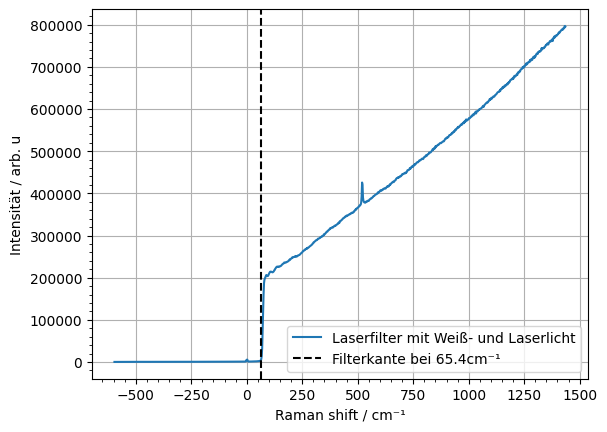

In [135]:
# Find highest value for ramanshift in filter2 with intensity < 10000
max = 0
for i in range(len(filter2)):
    if filter2[i,1] > max and filter2[i,1] < 7000:
        max = filter2[i,1]
        max_i = i
print(f'Filter lässt bei: {filter2[max_i,0]:.1f}cm⁻¹ erst wieder Licht durch Licht durch')
plot_raman(filter2, "Laserfilter mit Weiß- und Laserlicht", "plots/filter-mit-licht.png")
# Plot vertical line at filter2[max_i,0]
plt.axvline(filter2[max_i,0], color='k', linestyle='--', label=f'Filterkante bei {filter2[max_i,0]:.1f}cm⁻¹')
plt.legend()
plt.savefig("plots/filter-mit-licht.png")
plt.show()

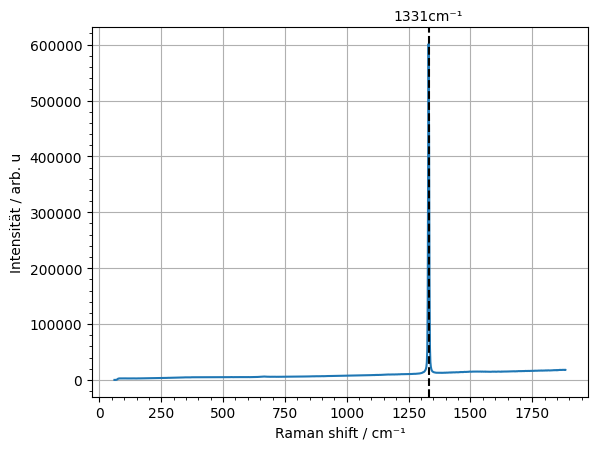

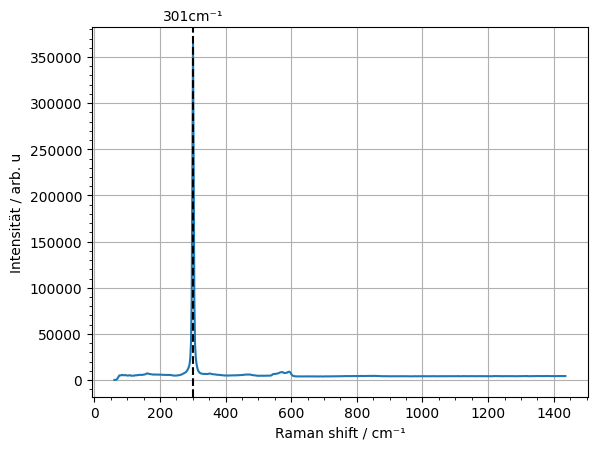

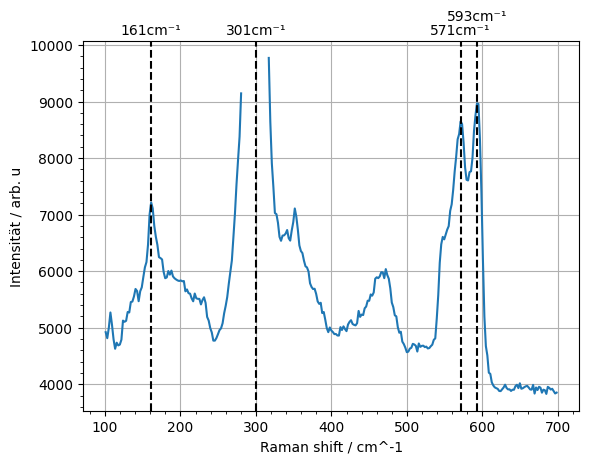

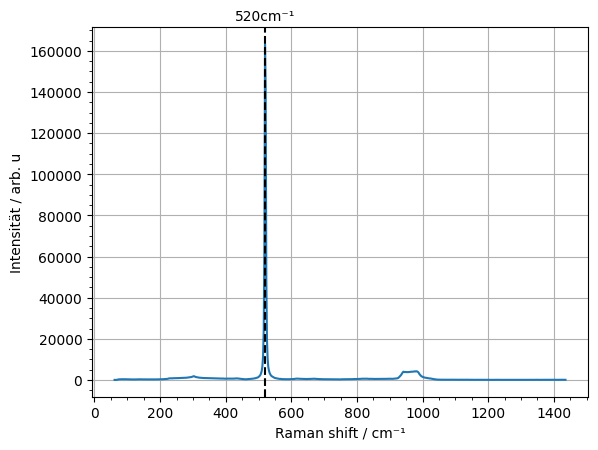

In [136]:
# Remove all values for less than 60 for C, Ge and Si
C = C[C[:,0] > 60]
Ge = Ge[Ge[:,0] > 60]
Si = Si[Si[:,0] > 60]

plot_raman(C, "Ramanspektrum von Diamant")
plot_peaks(C, count=1, distance=1, prominence=1)
plt.savefig("plots/c.png")
plt.show()

plot_raman(Ge, "Ramanspektrum von Germanium")
plot_peaks(Ge, count=1, distance=20, prominence=1)
plt.savefig("plots/ge.png")
plt.show()

# Plot the Geramanium spectrum between 100 and 700
# Plot only upto intensities of 10000
Ge_1 = Ge[Ge[:,0] > 100]
Ge_1 = Ge_1[Ge_1[:,0] < 300]
Ge_1 = Ge_1[Ge_1[:,1] < 10000]
Ge_2 = Ge[Ge[:,0] > 300]
Ge_2 = Ge_2[Ge_2[:,0] < 700]
Ge_2 = Ge_2[Ge_2[:,1] < 10000]
plt.plot(Ge_1[:, 0], Ge_1[:, 1], color='C0')
plt.plot(Ge_2[:, 0], Ge_2[:, 1], color='C0')
plt.xlabel("Raman shift / cm^-1")
plt.ylabel("Intensität / arb. u")
plt.minorticks_on()
plt.grid()
plot_peaks(Ge, count=4, distance=1, prominence=1)
plt.savefig("plots/ge-ausschnitt.png")
plt.show()

plot_raman(Si, "Ramanspektrum von Silizium")
plot_peaks(Si, count=1, distance=20, prominence=1)
plt.savefig("plots/si.png")
plt.show()

In [137]:
# Print the peaks for the materials
peaks, index = scipy.signal.find_peaks(C[:, 1])
peaks = peaks[np.argsort(C[peaks, 1])][::-1]
print(f"Diamant: {C[peaks[0], 0]}cm⁻¹")

peaks, index = scipy.signal.find_peaks(Ge[:, 1])
peaks = peaks[np.argsort(Ge[peaks, 1])][::-1]
print(f"Germanium: {Ge[peaks[0], 0]}cm⁻¹")

peaks, index = scipy.signal.find_peaks(Si[:, 1])
peaks = peaks[np.argsort(Si[peaks, 1])][::-1]
print(f"Silizium: {Si[peaks[0], 0]}cm⁻¹")

# Ramanshift of the peaks of Ge
peaks, index = scipy.signal.find_peaks(Ge[:, 1])
peaks = peaks[np.argsort(Ge[peaks, 1])][::-1]
# First 4 peaks of Ge
shifts = Ge[peaks[:4], 0]
print(f"Germanium: {shifts}cm⁻¹")
# Frquency of the peaks of Ge, in THz, light source is 515nm
freqs = (shifts * 1e-2 + 1/(515e-9)) * const.c
print(f"Germanium: {freqs}Hz")

Diamant: 1330.974609cm⁻¹
Germanium: 300.716797cm⁻¹
Silizium: 519.746094cm⁻¹
Germanium: [300.716797 592.822266 571.164063 161.150391]cm⁻¹
Germanium: [5.82122179e+14 5.82123055e+14 5.82122990e+14 5.82121761e+14]Hz


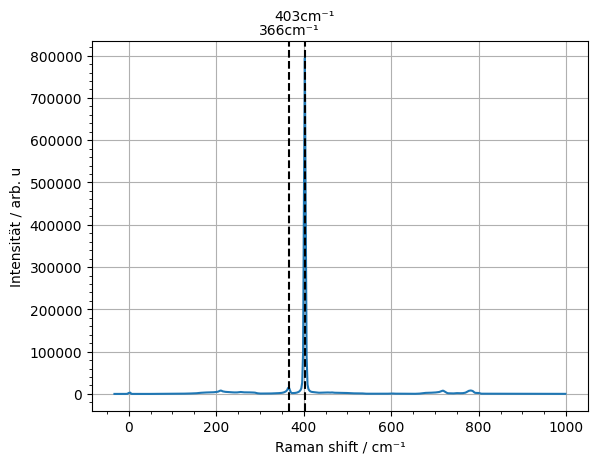

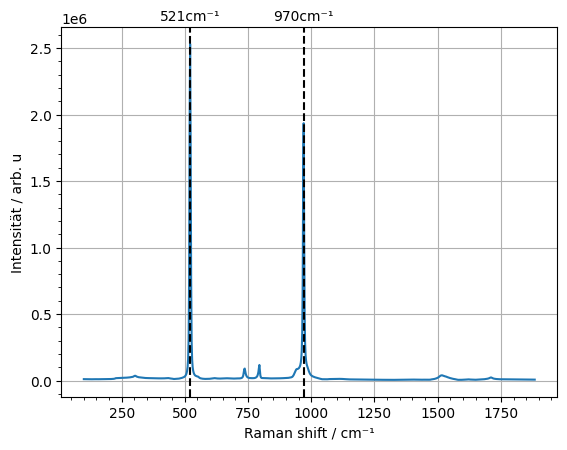

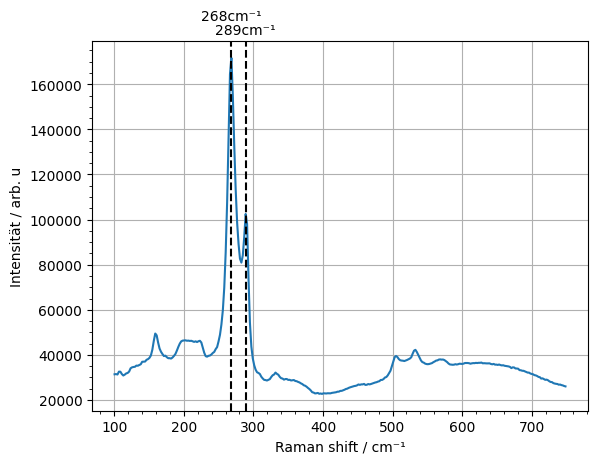

In [138]:
# Remove all values less than 100 for GaAs and GaN1 as they still include the laser, For GaAs remove all values over 750, For GaP Remove above 1000
GaP = GaP[GaP[:,0] < 1000]
GaN = GaN2[GaN2[:,0] > 100]
GaAs = GaAs[GaAs[:,0] > 100]
GaAs = GaAs[GaAs[:,0] < 750]

plot_raman(GaP, "GaP", "plots/gap.png")
plot_peaks(GaP, count=2, distance=1, prominence=1)
plt.savefig("plots/gap.png")
plt.show()

plot_raman(GaN, "GaN", "plots/gan.png")
plot_peaks(GaN, count=2, distance=1, prominence=1)
plt.savefig("plots/gan.png")
plt.show()

plot_raman(GaAs, "GaAs", "plots/gaas.png")
plot_peaks(GaAs, count=2, distance=1, prominence=1)
plt.savefig("plots/gaas.png")
plt.show()


In [139]:
# Print the peaks for the materials
peaks_GaP, _ = scipy.signal.find_peaks(GaP[:, 1], distance=1, prominence=1)
peaks_GaP = peaks_GaP[np.argsort(GaP[peaks_GaP, 1])][::-1]

peaks_GaN, _ = scipy.signal.find_peaks(GaN[:, 1])
peaks_GaN = peaks_GaN[np.argsort(GaN[peaks_GaN, 1])][::-1]

peaks_GaAs, _ = scipy.signal.find_peaks(GaAs[:, 1])
peaks_GaAs = peaks_GaAs[np.argsort(GaAs[peaks_GaAs, 1])][::-1]

# Calculate the spring constant in the model of the infinite linear chain
mass_ga = 69.723 * const.u
mass_p = 30.973762 * const.u
mass_n = 14.0067 * const.u
mass_as = 74.921595 * const.u

def spring_constant(mass_1, mass_2, shift):
    return 2 * const.pi**2 * const.c**2 * (shift * 1e2)**2 / (1/mass_1 + 1/mass_2)

def calculate_mu(mass_1, mass_2):
    return mass_1 * mass_2 / (mass_1 + mass_2)

print("Spring constants:")
print(f"GaP: {GaP[peaks_GaP[0], 0]}cm⁻¹, {spring_constant(mass_ga, mass_p, GaP[peaks_GaP[0], 0])}N/m")
print(f"GaP: {GaP[peaks_GaP[1], 0]}cm⁻¹, {spring_constant(mass_ga, mass_p, GaP[peaks_GaP[1], 0])}N/m")
print(f"GaN: {GaN[peaks_GaN[0], 0]}cm⁻¹, {spring_constant(mass_ga, mass_n, GaN[peaks_GaN[0], 0])}N/m")
print(f"GaN: {GaN[peaks_GaN[1], 0]}cm⁻¹, {spring_constant(mass_ga, mass_n, GaN[peaks_GaN[1], 0])}N/m")
print(f"GaAs: {GaAs[peaks_GaAs[0], 0]}cm⁻¹, {spring_constant(mass_ga, mass_as, GaAs[peaks_GaAs[0], 0])}N/m")
print(f"GaAs: {GaAs[peaks_GaAs[1], 0]}cm⁻¹, {spring_constant(mass_ga, mass_as, GaAs[peaks_GaAs[1], 0])}N/m")

Spring constants:
GaP: 402.705078cm⁻¹, 102.45873109811356N/m
GaP: 366.291016cm⁻¹, 84.7670939991798N/m
GaN: 520.943359cm⁻¹, 93.24673058560101N/m
GaN: 970.013672cm⁻¹, 323.30194145325845N/m
GaAs: 268.386719cm⁻¹, 76.63429328751596N/m
GaAs: 288.878906cm⁻¹, 88.78360512140729N/m


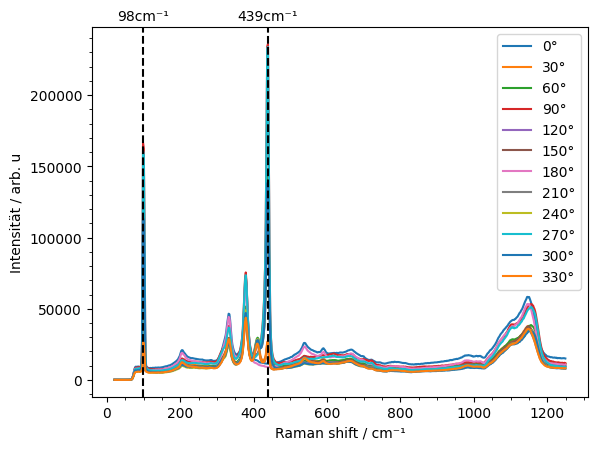

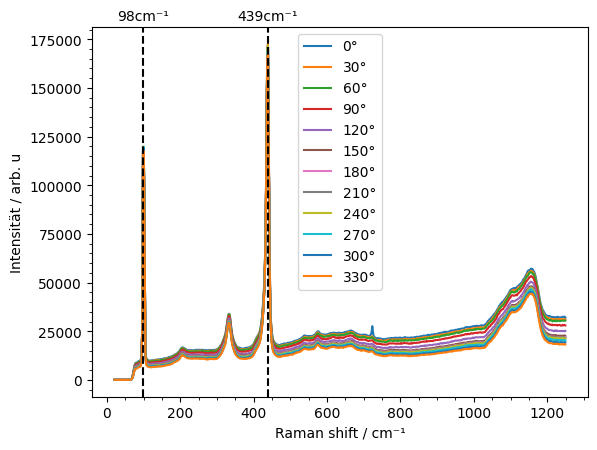

In [140]:
# Plot data for ZnO_1
# Cutoff data after 1250 and above 20
for i, data in enumerate(ZnO_1):
    ZnO_1[i] = data[data[:,0] < 1250]
    ZnO_1[i] = ZnO_1[i][ZnO_1[i][:,0] > 20]

for i, data in enumerate(ZnO_1):
    plot_raman(data, label=f"{i*30}°", legend=True)
plot_peaks(ZnO_1[3], count=2, distance=1, prominence=1)
plt.savefig("plots/zno1.png")
plt.show()

# Plot data for ZnO_2
# Cutoff data after 1250 and above 20
for i, data in enumerate(ZnO_2):
    ZnO_2[i] = data[data[:,0] < 1250]
    ZnO_2[i] = ZnO_2[i][ZnO_2[i][:,0] > 20]

for i, data in enumerate(ZnO_2):
    plot_raman(data, label=f"{i*30}°", legend=True)
plot_peaks(ZnO_2[3], count=2, distance=1, prominence=1)
plt.savefig("plots/zno2.png")
plt.show()


ZnO_1: 438.958984cm⁻¹
ZnO_1: 98.369141cm⁻¹
[9063.09375, 15202.959961, 85782.328125, 166467.5, 112352.046875, 24809.232422, 7838.515137, 13494.612305, 78889.53125, 160977.515625, 113811.84375, 26477.570313]
[11375.262695, 27009.138672, 147538.375, 235979.5, 134146.953125, 23757.980469, 9113.862305, 23860.369141, 137614.265625, 233774.984375, 138825.21875, 25856.316406]
[119412.164063, 118989.023438, 117250.359375, 116240.390625, 115531.101563, 115997.898438, 117428.59375, 119288.5, 119938.375, 119295.773438, 118459.179688, 117839.617188]
[172432.75, 172599.609375, 170357.171875, 168225.96875, 166139.0, 166434.796875, 168833.96875, 170467.140625, 171627.546875, 170098.03125, 168150.125, 167963.046875]


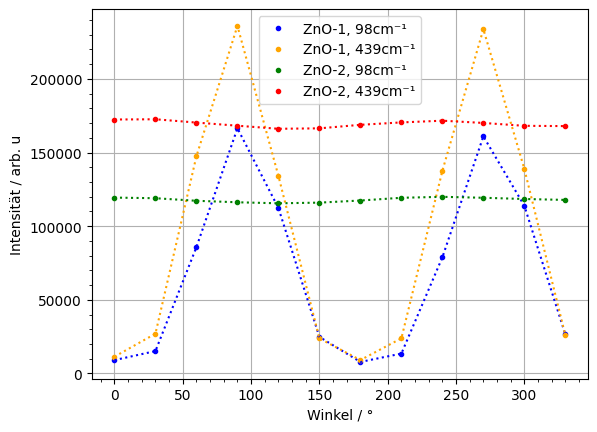

In [141]:
# plot the first zno1 raman spectrum with the peaks at 98 and 439
peaks, _ = scipy.signal.find_peaks(ZnO_1[3][:, 1])
peaks = peaks[np.argsort(ZnO_1[3][peaks, 1])][::-1]
print(f"ZnO_1: {ZnO_1[3][peaks[0], 0]}cm⁻¹")
print(f"ZnO_1: {ZnO_1[3][peaks[1], 0]}cm⁻¹")

# Get the intensity of the peaks at 98 and 439 for ZnO_1
peak_98_intesities_1 = [data[data[:,0] == 98.369141][0][1] for data in ZnO_1]
peak_439_intesities_1 = [data[data[:,0] == 438.958984][0][1] for data in ZnO_1]
print(f"{peak_98_intesities_1}")
print(f"{peak_439_intesities_1}")

# Get the intensity of the peaks at 98 and 439 for ZnO_2
peak_98_intesities_2 = [data[data[:,0] == 98.369141][0][1] for data in ZnO_2]
peak_439_intesities_2 = [data[data[:,0] == 438.958984][0][1] for data in ZnO_2]
print(f"{peak_98_intesities_2}")
print(f"{peak_439_intesities_2}")

# Plot the intensity of the peaks at 98 and 439, mark data points and connect with dotted lines
plt.plot(np.arange(0, 360, 30), peak_98_intesities_1, '.', color='blue', label="ZnO-1, 98cm⁻¹")
plt.plot(np.arange(0, 360, 30), peak_439_intesities_1, '.', color='orange', label="ZnO-1, 439cm⁻¹")
plt.plot(np.arange(0, 360, 30), peak_98_intesities_1, ':', color='blue')
plt.plot(np.arange(0, 360, 30), peak_439_intesities_1, ':', color='orange')

plt.plot(np.arange(0, 360, 30), peak_98_intesities_2, '.', color='green', label="ZnO-2, 98cm⁻¹")
plt.plot(np.arange(0, 360, 30), peak_439_intesities_2, '.', color='red', label="ZnO-2, 439cm⁻¹")
plt.plot(np.arange(0, 360, 30), peak_98_intesities_2, ':', color='green')
plt.plot(np.arange(0, 360, 30), peak_439_intesities_2, ':', color='red')

plt.xlabel("Winkel / °")
plt.ylabel("Intensität / arb. u")
plt.minorticks_on()
plt.grid()
plt.legend()
plt.savefig("plots/peak-intensities.png")

